In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('cos.csv')

In [3]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


In [5]:
df.describe()

,product_id,category_id,price,user_id
count,20692840.00,20692840.00,20692840.00,20692840.00
mean,5484296.74,1554230182673053440.00,8.53,521552663.56
std,1305715.73,169103784917515008.00,19.38,87443121.50
min,3752.00,1487580004807082752.00,-79.37,465496.00
25%,5724650.00,1487580005754995456.00,2.06,481830633.25
50%,5810720.00,1487580008263189504.00,4.05,553129688.00
75%,5857864.00,1487580013506068736.00,7.06,578857321.00
max,5932595.00,2242903426784559104.00,327.78,622090237.00


In [6]:
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
dtype: int64

In [7]:
df.duplicated().sum()

1109098

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df = df[df['price'] >= 0]

In [11]:
df['event_time'] = pd.to_datetime(df['event_time'],infer_datetime_format=True)

C:\Users\aDELL\AppData\Local\Temp\ipykernel_18476\2350630517.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['event_time'] = pd.to_datetime(df['event_time'],infer_datetime_format=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19583618 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 1.5+ GB


C:\Users\aDELL\AppData\Local\Temp\ipykernel_18476\3863630009.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_type_split.index, y=event_type_split.values, palette="Spectral")


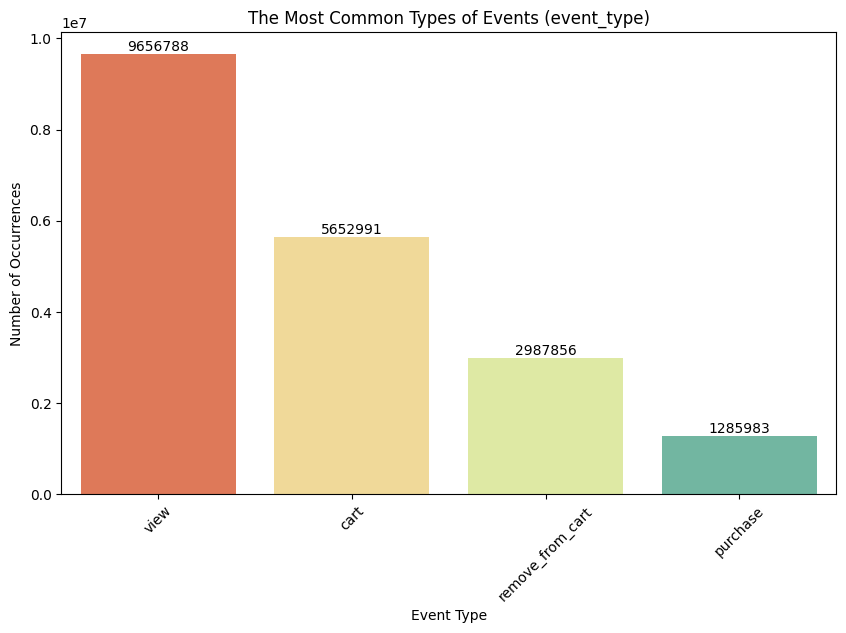

In [13]:
event_type_split = df['event_type'].value_counts()

# Create a bar plot with vertical bars
plt.figure(figsize=(10, 6))
sns.barplot(x=event_type_split.index, y=event_type_split.values, palette="Spectral")

# Add values on top of the bars
for i, value in enumerate(event_type_split.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

# Set plot titles and labels
plt.title("The Most Common Types of Events (event_type)")
plt.xlabel("Event Type")
plt.ylabel("Number of Occurrences")

# Rotate x-axis labels if needed (optional)
plt.xticks(rotation=45)

plt.show()

<Figure size 2000x1000 with 0 Axes>

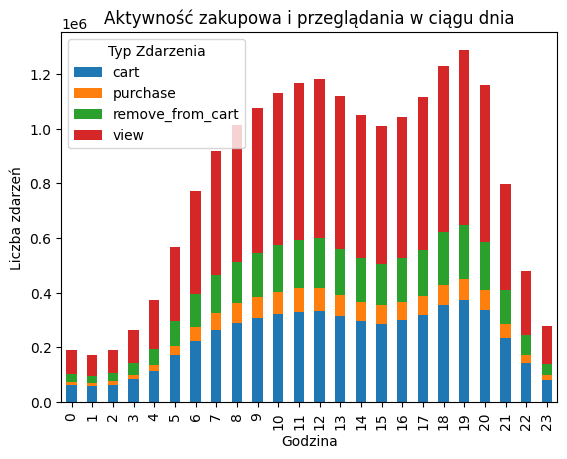

In [14]:
df['hour'] = df['event_time'].dt.hour
hourly_events = df.groupby(['hour', 'event_type']).size().unstack().fillna(0)

plt.figure(figsize=(20, 10))
bars = hourly_events.plot(kind='bar', stacked=True)
plt.title('Aktywność zakupowa i przeglądania w ciągu dnia')
plt.xlabel('Godzina')
plt.ylabel('Liczba zdarzeń')
plt.legend(title='Typ Zdarzenia')

plt.show()

C:\Users\aDELL\AppData\Local\Temp\ipykernel_18476\3759281086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_df['hour'] = purchase_df['event_time'].dt.hour


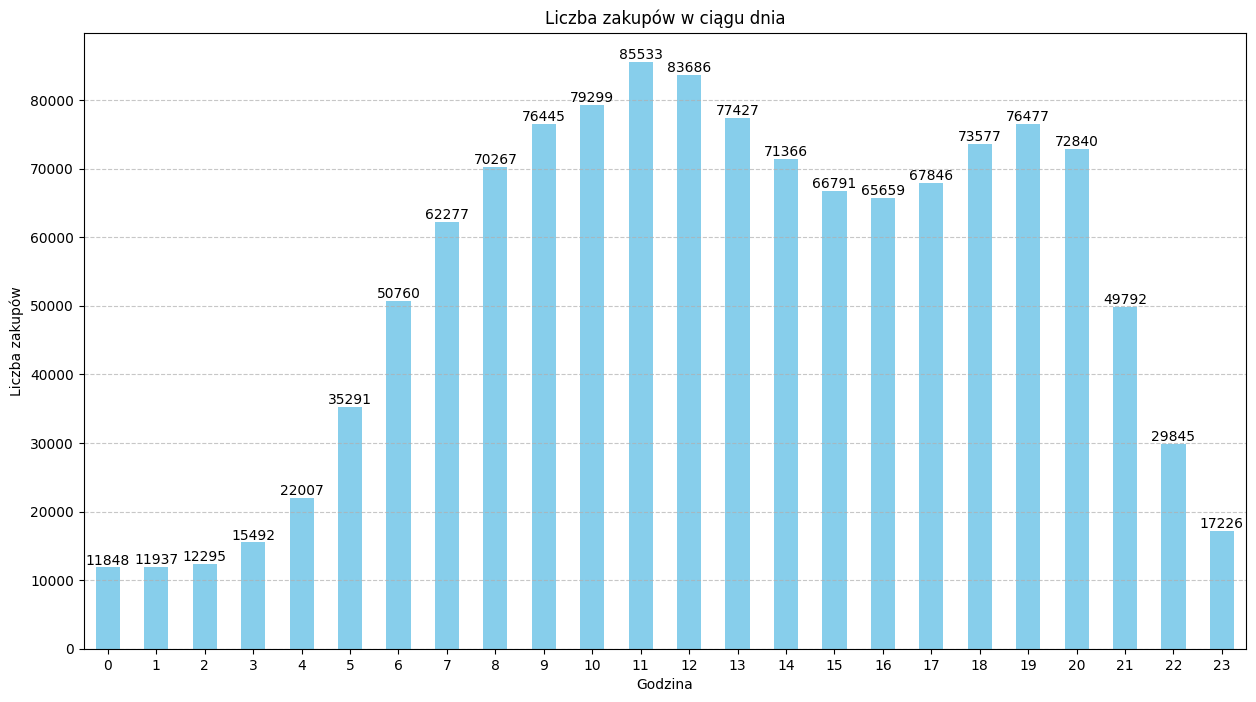

In [15]:
purchase_df = df[df['event_type'] == 'purchase']

# Extract the hour from 'event_time' for filtered data
purchase_df['hour'] = purchase_df['event_time'].dt.hour

# Group by hour and count the number of purchases
hourly_purchases = purchase_df.groupby(['hour']).size()

# Plot the hourly purchase activity
plt.figure(figsize=(15, 8))
bars = hourly_purchases.plot(kind='bar', color='skyblue')

# Add values on top of each bar
for i, value in enumerate(hourly_purchases):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

# Set titles and labels
plt.title('Liczba zakupów w ciągu dnia')
plt.xlabel('Godzina')
plt.ylabel('Liczba zakupów')
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

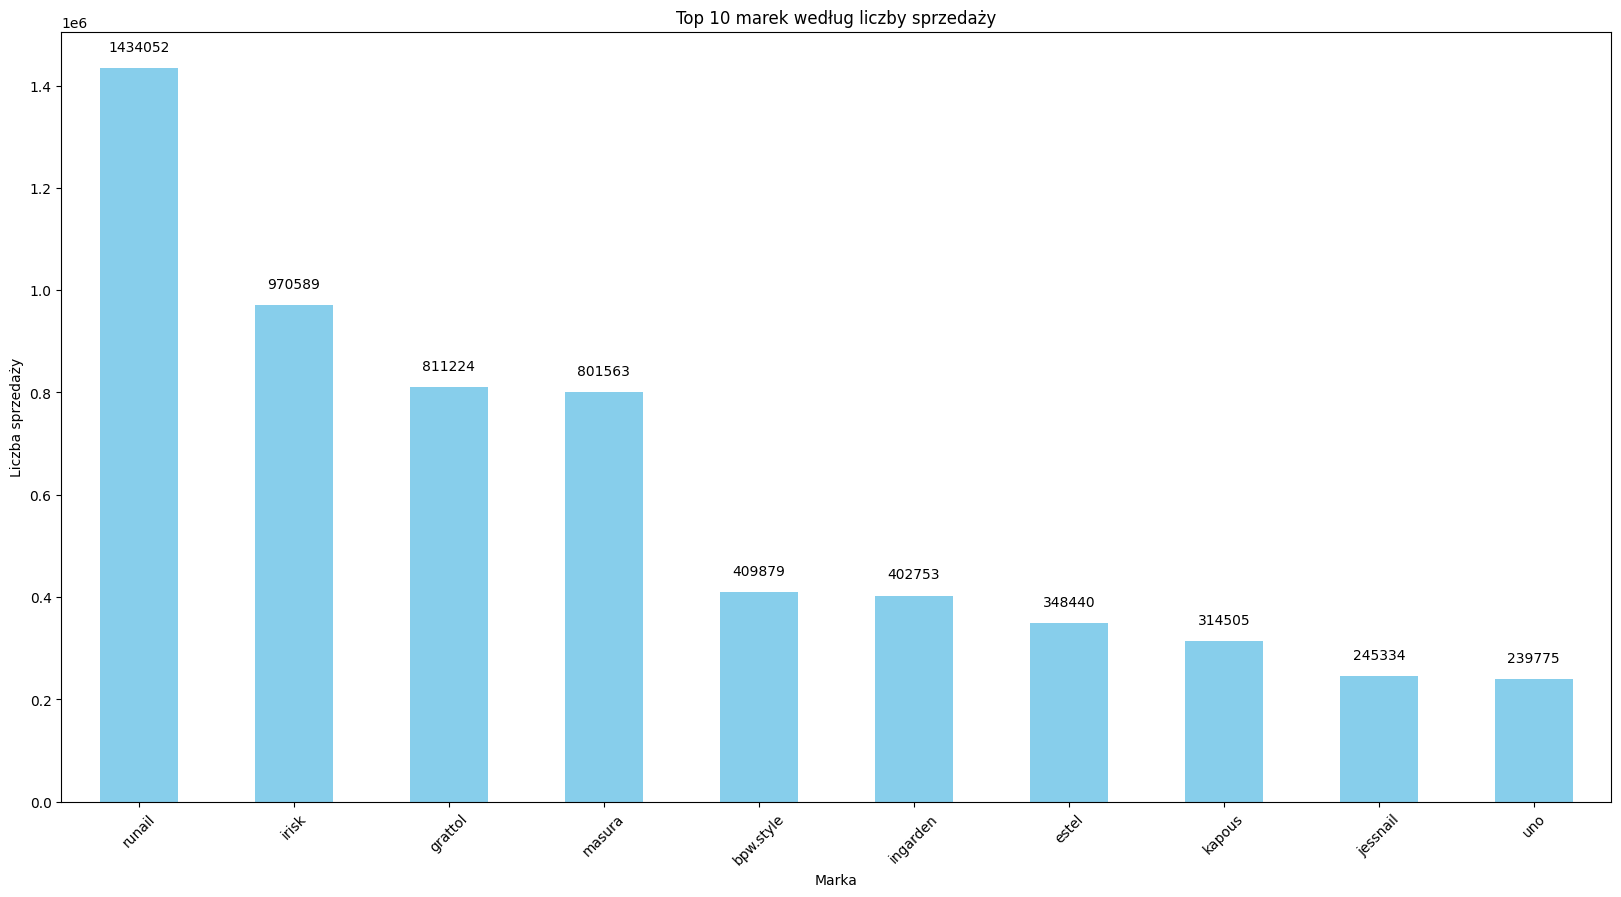

In [16]:
top_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(20, 10))
bars = top_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 marek według liczby sprzedaży')
plt.xlabel('Marka')
plt.ylabel('Liczba sprzedaży')
plt.xticks(rotation=45)

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', color='black', textcoords="offset points", xytext=(0,10))

plt.show()

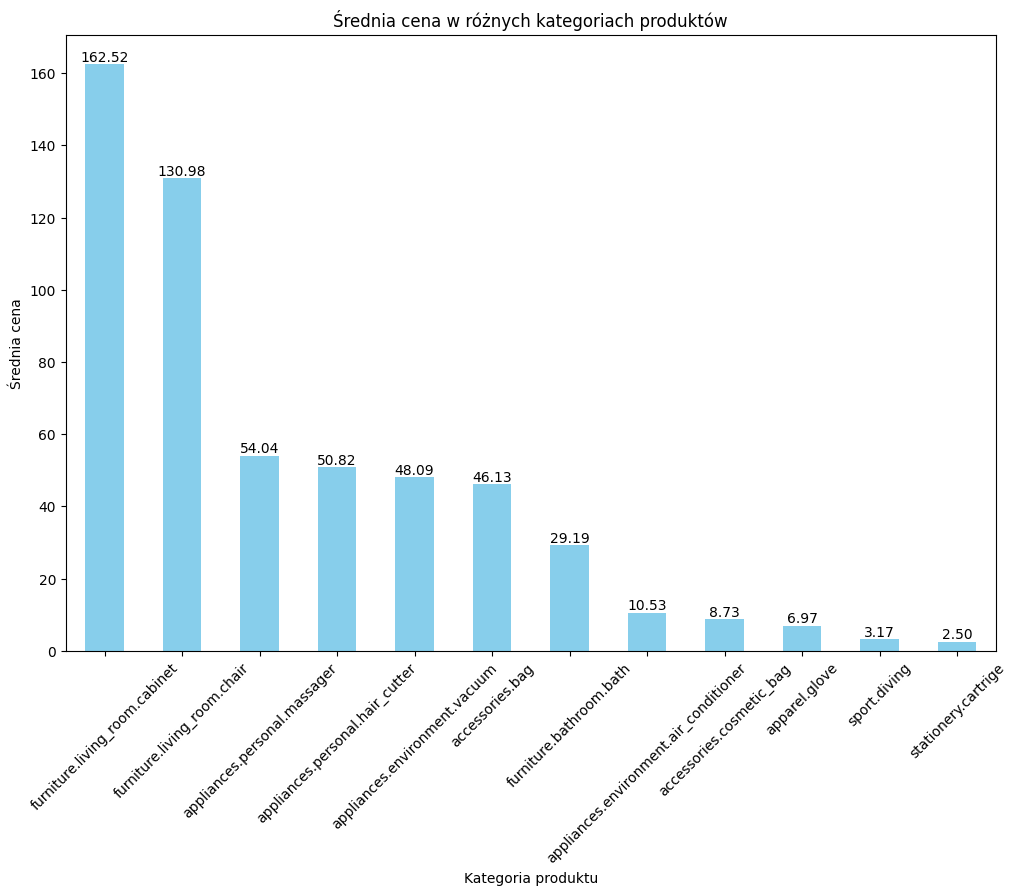

In [17]:
average_price_by_category = df.groupby('category_code')['price'].mean()

plt.figure(figsize=(12, 8))
bars = average_price_by_category.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Średnia cena w różnych kategoriach produktów')
plt.ylabel('Średnia cena')
plt.xlabel('Kategoria produktu')
plt.xticks(rotation=45)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',
             ha='center', va='bottom')

plt.show()

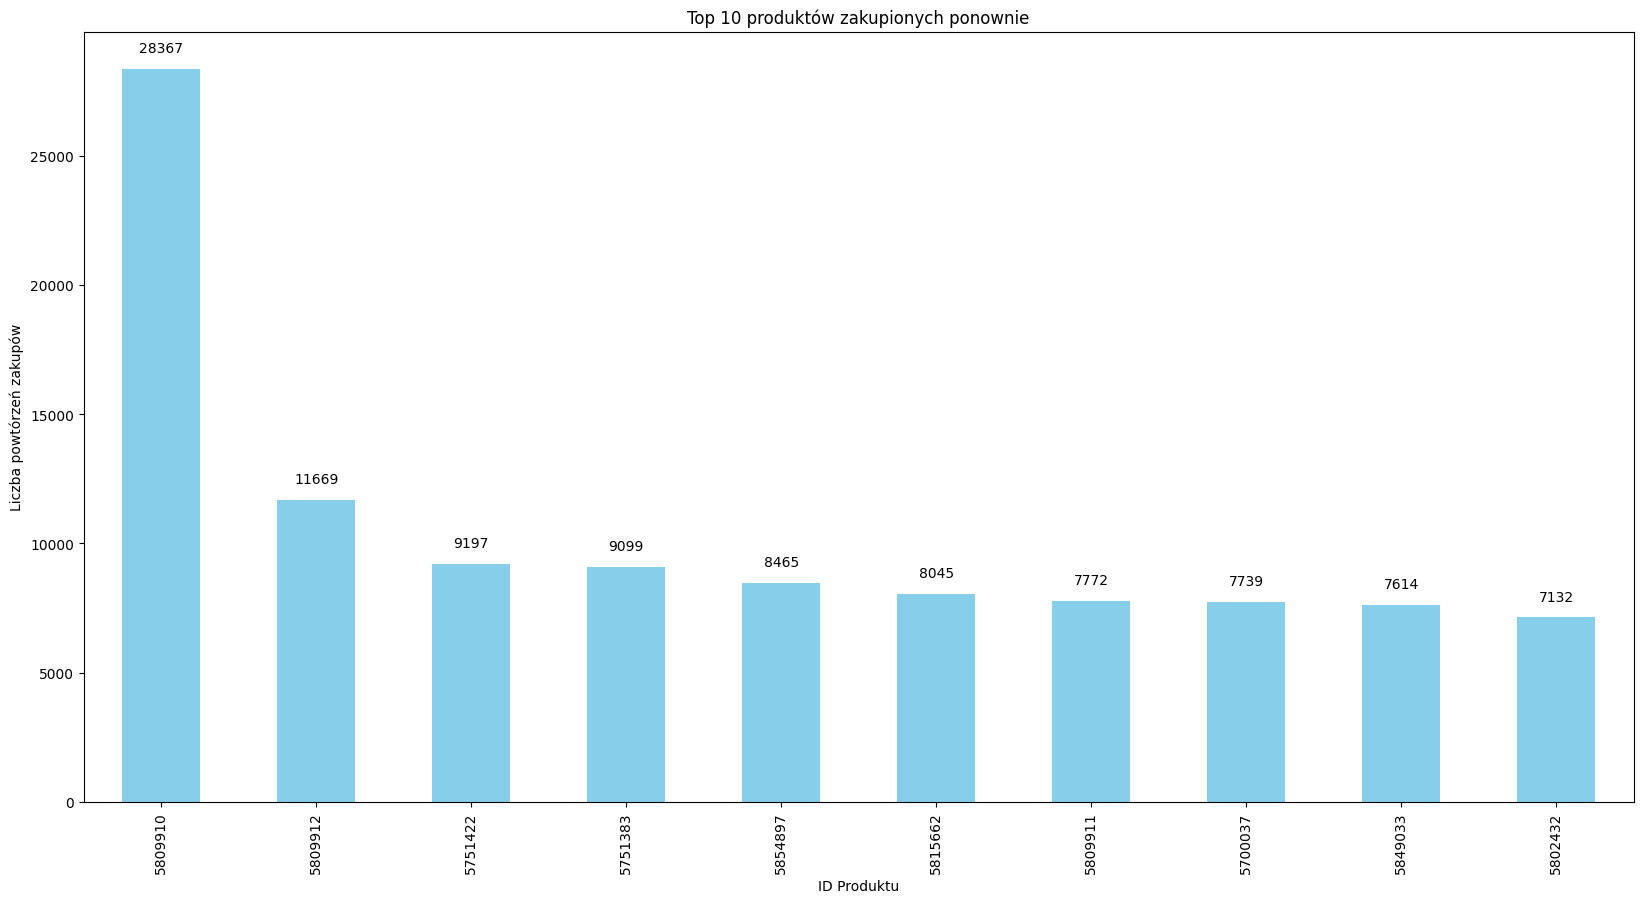

In [18]:
repeat_purchases = df.groupby(['user_id', 'product_id']).size()
repeat_purchases = repeat_purchases[repeat_purchases > 1].reset_index(name='counts')
top_repeats = repeat_purchases['product_id'].value_counts().head(10)

plt.figure(figsize=(20, 10))
bars = top_repeats.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Top 10 produktów zakupionych ponownie')
plt.xlabel('ID Produktu')
plt.ylabel('Liczba powtórzeń zakupów')
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', color='black', textcoords="offset points", xytext=(0,10))
plt.show()

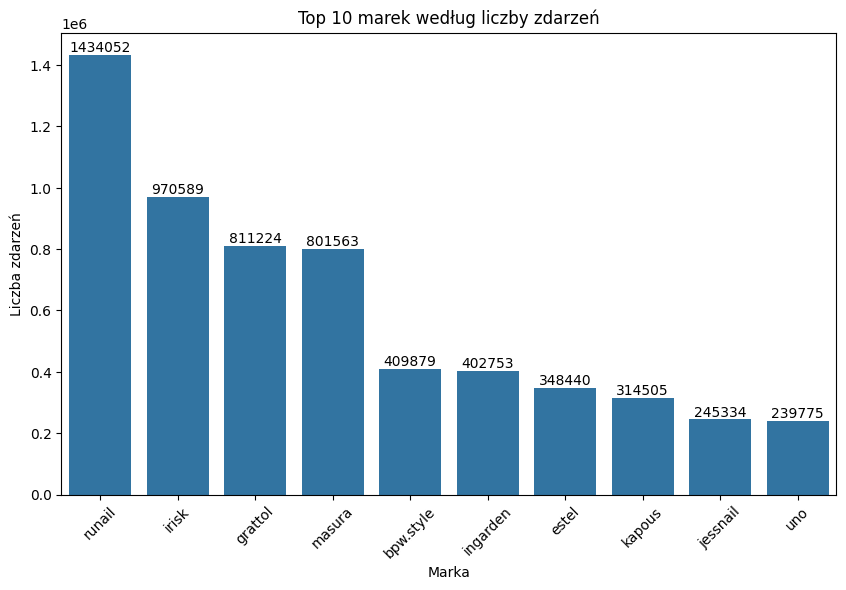

In [19]:
brand_counts = df['brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Top 10 marek według liczby zdarzeń')
plt.xlabel('Marka')
plt.ylabel('Liczba zdarzeń')
plt.xticks(rotation=45)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom')

plt.show()

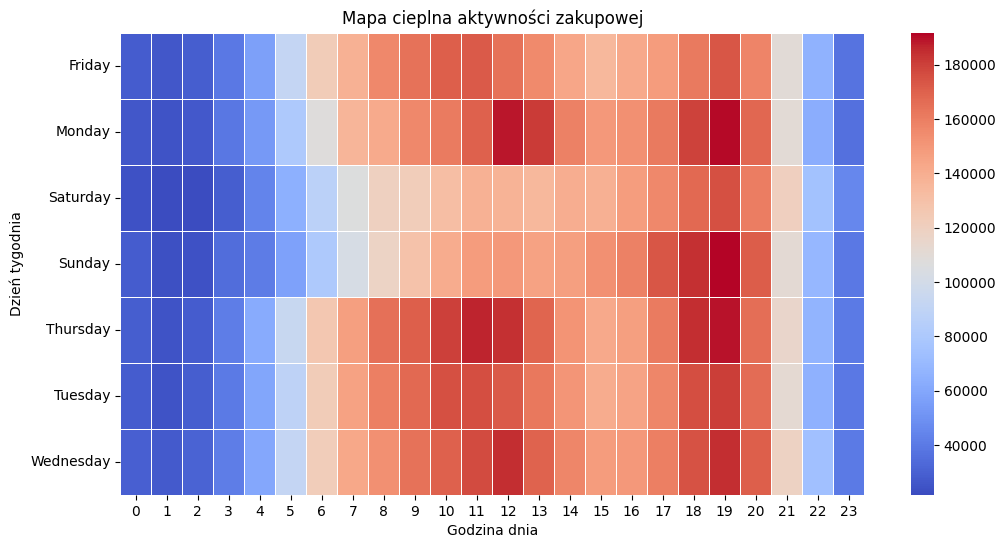

In [20]:
df['event_time'] = pd.to_datetime(df['event_time'])
df['hour'] = df['event_time'].dt.hour
df['day'] = df['event_time'].dt.day_name()

heatmap_data = df.groupby(['day', 'hour']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt="d", linewidths=.5)
plt.title('Mapa cieplna aktywności zakupowej')
plt.xlabel('Godzina dnia')
plt.ylabel('Dzień tygodnia')
plt.show()

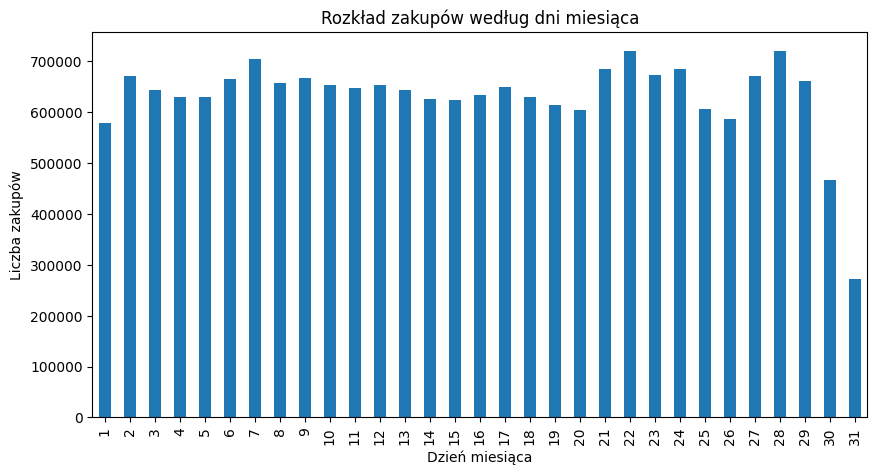

In [21]:
df['day_of_month'] = df['event_time'].dt.day

# Grupuj zakupy według dni miesiąca
day_of_month_purchases = df['day_of_month'].value_counts().sort_index()

# Wizualizacja
day_of_month_purchases.plot(kind='bar', title='Rozkład zakupów według dni miesiąca', figsize=(10, 5))
plt.xlabel('Dzień miesiąca')
plt.ylabel('Liczba zakupów')
plt.show()


Brands' comparison: purchased and added to cart:
            Purchased  Added to Cart
brand                              
runail        111350         475816
irisk          73747         324270
masura         49566         245772
grattol        49542         216196
bpw.style      37941         132258
ingarden       27401         123685
estel          19424          85219
uno            17586          66725
freedecor      17467          69827
italwax        17061              0
kapous             0          71046


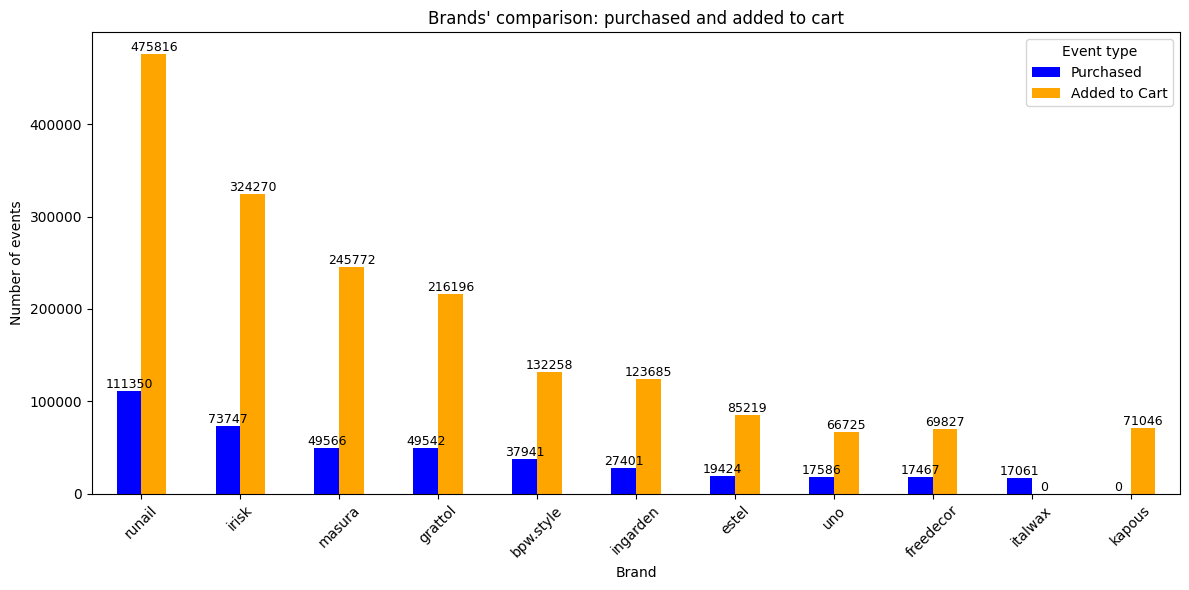

In [22]:
brands_purchase = df[df['event_type'] == 'purchase']['brand'].value_counts().head(10)
brands_cart = df[df['event_type'] == 'cart']['brand'].value_counts().head(10)

# Combine the top brands from both events
common_brands = set(brands_purchase.index) | set(brands_cart.index)

# Create a DataFrame for comparison
comparison = pd.DataFrame({
    'Purchased': brands_purchase.reindex(common_brands, fill_value=0),
    'Added to Cart': brands_cart.reindex(common_brands, fill_value=0)
}).sort_values(by='Purchased', ascending=False)

print("\nBrands' comparison: purchased and added to cart:\n", comparison)

# Visualization
ax = comparison.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'])

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9)

# Plot formatting
plt.title("Brands' comparison: purchased and added to cart")
plt.xlabel("Brand")
plt.ylabel("Number of events")
plt.legend(title='Event type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:

view_events = df[df['event_type'] == 'view']

avg_views_per_session = view_events.groupby('user_session')['product_id'].count().mean()
print(f"Średnia liczba `view` produktów w sesji: {avg_views_per_session}")

cart_events = df[df['event_type'] == 'cart']

# Obliczenie średniej liczby `cart` produktów na sesję
avg_carts_per_session = cart_events.groupby('user_session')['product_id'].count().mean()
print(f"Średnia liczba `cart` produktów w sesji: {avg_carts_per_session}")

avg_views_per_user = view_events.groupby('user_id')['product_id'].count().mean()
print(f"Średnia liczba `view` produktów na użytkownika: {avg_views_per_user}")

avg_carts_per_user = cart_events.groupby('user_id')['product_id'].count().mean()
print(f"Średnia liczba `cart` produktów na użytkownika: {avg_carts_per_user}")

purchase_events = df[df['event_type'] == 'purchase']

# Liczenie liczby zakupów w każdej sesji
purchases_per_session = purchase_events.groupby('user_session')['product_id'].count()

# Obliczenie średniej tylko dla sesji zakończonych `purchase`
avg_purchases_per_purchase_session = purchases_per_session.mean()
print(f"Średnia liczba kupionych produktów w sesjach zakończonych `purchase`: {avg_purchases_per_purchase_session}")


purchases_per_user = purchase_events.groupby('user_id')['product_id'].count()

# Obliczenie średniej liczby zakupów na użytkownika
avg_purchases_per_user = purchases_per_user.mean()
print(f"Średnia liczba kupionych produktów na użytkownika: {avg_purchases_per_user}")


sessions_per_user = df.groupby('user_id')['user_session'].nunique()

# Obliczenie średniej liczby sesji na użytkownika
avg_sessions_per_user = sessions_per_user.mean()

print(f"Średnia liczba sesji na użytkownika: {avg_sessions_per_user}")

Średnia liczba `view` produktów w sesji: 2.2558832097281307
Średnia liczba `cart` produktów w sesji: 5.731142851346142
Średnia liczba `view` produktów na użytkownika: 6.043976732338019
Średnia liczba `cart` produktów na użytkownika: 14.192511825019833
Średnia liczba kupionych produktów w sesjach zakończonych `purchase`: 8.263769382522476
Średnia liczba kupionych produktów na użytkownika: 11.63595975316238
Średnia liczba sesji na użytkownika: 2.7671021216842204
